cnn_model.py 파일에 함수를 선언하고 호출하는 방식으로 진행

In [6]:
# Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`

#!pip install tensorflow

# 도중에 에러가 발생하여 Anaconda Prompt에서 'python3 -m pip install --user keras' 실행 후 다시 '!pip install tensorflow'

  Using cached tensorboard-2.1.1-py3-none-any.whl (3.8 MB)
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.2.1
    Uninstalling tensorboard-2.2.1:
      Successfully uninstalled tensorboard-2.2.1


In [2]:
# import tensorflow as tf
# tf.__version__

'2.4.0'

In [1]:
# !pip install keras
# ! pip install opencv-python

In [3]:
# !pip install matplotlib
# !pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=1d88506a49b875621d4b382e90022eb2fdac253f3e0b7019192bf2a40980391c
  Stored in directory: c:\users\simmi\appdata\local\pip\cache\wheels\46\ef\c3\157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


  Using cached matplotlib-3.3.0-cp37-cp37m-win_amd64.whl (8.8 MB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached Pillow-7.2.0-cp37-cp37m-win_amd64.whl (2.1 MB)
  Using cached kiwisolver-1.2.0-cp37-none-win_amd64.whl (57 kB)


In [4]:
import tensorflow as tf
import cnn_model

In [5]:

from tensorflow.python import keras
# import keras

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# 입력과 출력 지정하기 --- (*1)
im_rows = 32 # 이미지의 높이
im_cols = 32 # 이미지의 너비
im_color = 3 # 이미지의 색공간
in_shape = (im_rows, im_cols, im_color)
nb_classes = 5

# 사진 데이터 읽어 들이기 --- (*2)
photos = np.load('image/photos.npz')
x = photos['x']
y = photos['y']

# 읽어들인 데이터를 3차원 배열로 변환하기 --- (*3)
x = x.reshape(-1, im_rows, im_cols, im_color)
x = x.astype('float32') / 255
# 레이블 데이터를 One-hot 형식으로 변환하기 --- (*4)
y = keras.utils.np_utils.to_categorical(y.astype('int32'), nb_classes)

# 학습 전용과 테스트 전용으로 구분하기 --- (*5)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=0.8)

# CNN 모델 만들기 (위에 선언한 함수) --- (*6)
model = cnn_model.get_model(in_shape, nb_classes)

# 학습 실행하기 --- (*7)
hist = model.fit(x_train, y_train,
          batch_size=32,
          epochs=20,
          verbose=1,
          validation_data=(x_test, y_test))

# 모델 평가하기 --- (*8)
score = model.evaluate(x_test, y_test, verbose=1)
print('정답률=', score[1], 'loss=', score[0])


Epoch 1/20
29/29 [==============================] - 4s 103ms/step - loss: 1.5751 - accuracy: 0.2664 - val_loss: 1.5631 - val_accuracy: 0.2434
Epoch 2/20
29/29 [==============================] - 2s 84ms/step - loss: 1.5202 - accuracy: 0.3204 - val_loss: 1.4072 - val_accuracy: 0.4779
Epoch 3/20
29/29 [==============================] - 2s 84ms/step - loss: 1.3954 - accuracy: 0.4184 - val_loss: 1.7681 - val_accuracy: 0.3938
Epoch 4/20
29/29 [==============================] - 2s 80ms/step - loss: 1.3785 - accuracy: 0.4704 - val_loss: 3.9629 - val_accuracy: 0.2434
Epoch 5/20
29/29 [==============================] - 2s 80ms/step - loss: 1.5823 - accuracy: 0.4429 - val_loss: 1.3669 - val_accuracy: 0.4248
Epoch 6/20
29/29 [==============================] - 2s 79ms/step - loss: 1.2516 - accuracy: 0.4856 - val_loss: 1.3400 - val_accuracy: 0.4513
Epoch 7/20
29/29 [==============================] - 2s 80ms/step - loss: 1.1401 - accuracy: 0.5219 - val_loss: 1.3492 - val_accuracy: 0.4646
Epoch 8/20
2

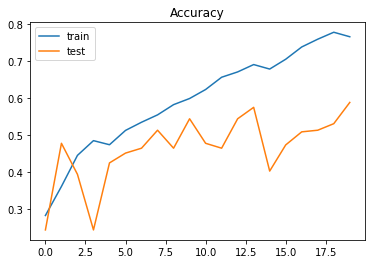

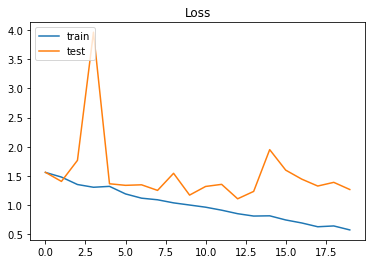

In [6]:

# 학습 상태를 그래프로 그리기 --- (*9)
# 정답률 추이를 그래프로 그리기
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 손실 추이를 그래프로 그리기
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

model.save_weights('./image/photos-model-light.hdf5')


[ 결과 ] 

정답률이 70% 정도 나온다 하더라도 좋은 결과가 아니다.

만일 값이 너무 안 좋으면 데이타클리닝 작업으로 필요없는 사진을 제거해야 한다.

정답률의 차이는 대부분 데이터의 품질에서 발생한다.